# <code style="font-weight:bold"> Phase 1 - Ensemble Machine Learning</code>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', comment='#')

In [3]:
data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
3,14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2023-06-12,2022-09,2023-06-12
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,ups And b,ups And,1,2,3,Radial Velocity,1996,Lick Observatory,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5479,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5480,ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5481,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


In [4]:
data1=data[['sy_dist','pl_orbsmax']]
data1=data1.dropna()

In [5]:
data1

,sy_dist,pl_orbsmax
0,93.1846,1.290000
1,125.3210,1.530000
2,75.4392,0.830000
3,17.9323,2.774000
4,21.1397,1.660000
...,...,...
5478,13.4054,0.059222
5479,13.4054,0.827774
5480,13.4054,2.513290
5481,52.5973,1.180000


In [6]:
data1.describe()

,sy_dist,pl_orbsmax
count,3201.000000,3201.000000
mean,662.589693,10.029514
std,1334.033326,171.596807
min,1.301190,0.004400
25%,55.850300,0.056000
50%,235.479000,0.118780
75%,688.573000,0.830000
max,8240.000000,7506.000000


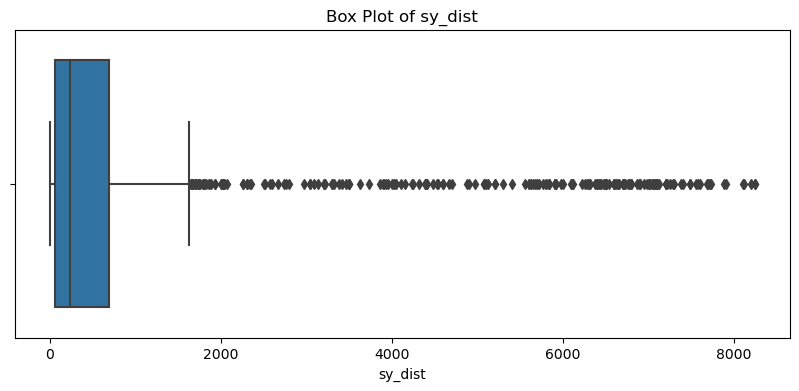

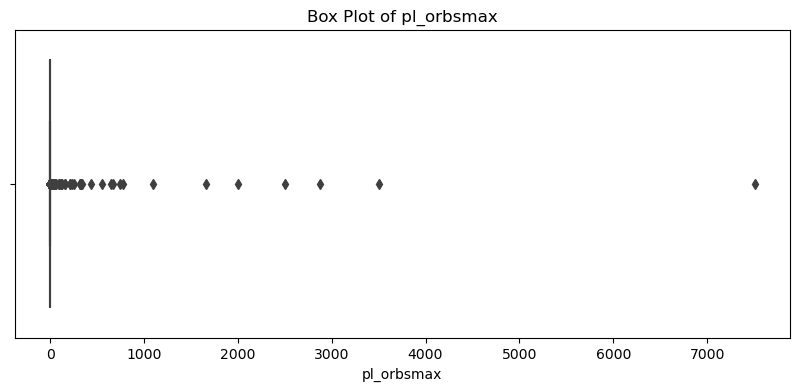

In [7]:
# Plotting box plots for each xfeature
for column in data1.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data1[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [8]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Calculating the Z-scores for the planetary data
z_scores = zscore(data1)

# Keeping only the rows with Z-scores less than 3 (you can adjust this threshold)
data1_z_filtered =  data1[(z_scores < 3).all(axis=1)]

# Applying the IQR method to further filter outliers
Q1 = data1_z_filtered.quantile(0.25)
Q3 = data1_z_filtered.quantile(0.75)
IQR = Q3 - Q1
data1_no_outliers = data1_z_filtered[~((data1_z_filtered < (Q1 - 1.5 * IQR)) | (data1_z_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalizing the data (mean=0, std=1)
scaler = StandardScaler()
data1_normalized = scaler.fit_transform(data1_no_outliers)

# Converting the normalized data back to a DataFrame for better readability
data1_normalized_df = pd.DataFrame(data1_normalized, columns=data1_no_outliers.columns)

In [9]:
data1_normalized_df.describe()

,sy_dist,pl_orbsmax
count,2.456000e+03,2.456000e+03
mean,2.314471e-17,1.157236e-17
std,1.000204e+00,1.000204e+00
min,-1.066556e+00,-6.994571e-01
25%,-8.896328e-01,-5.224588e-01
50%,-2.860536e-01,-3.875273e-01
75%,6.833810e-01,-2.222032e-02
max,2.963783e+00,4.291419e+00


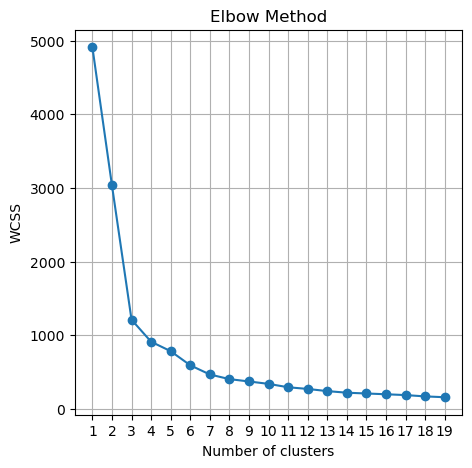

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data1_normalized' is a normalized dataset ready for clustering

# Elbow Method
wcss = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(data1_normalized).inertia_ for k in range(1, 20)]

# Plotting the Elbow Method
plt.figure(figsize=(5, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


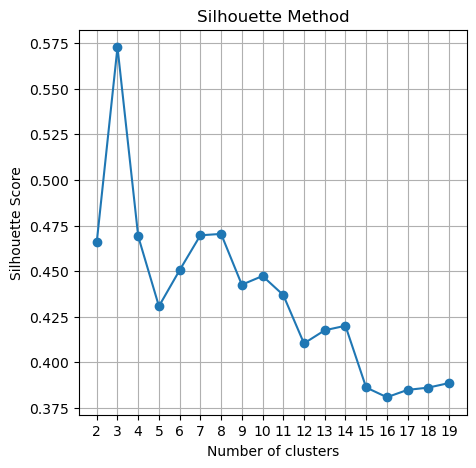

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'data1_normalized' is a normalized dataset ready for clustering

# Silhouette Method
silhouette_scores = [silhouette_score(data1_normalized, KMeans(n_clusters=k, n_init='auto', random_state=42).fit_predict(data1_normalized)) for k in range(2, 20)]

# Plotting the Silhouette Method
plt.figure(figsize=(5, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
import numpy as np

# Optimal number of clusters
n_clusters = 3

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(data1_normalized)

# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(data1_normalized)

# DBSCAN Clustering
#dbscan = DBSCAN(eps=0.1, min_samples=3)
#dbscan_clusters = dbscan.fit_predict(habitable_data1_normalized)

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(data1_normalized)

# Co-Association Matrix for Ensemble Learning
n_samples = data1_normalized.shape[0]
co_association_matrix = np.zeros((n_samples, n_samples))

# Increment co-association matrix based on clustering results
for clusters in [kmeans_clusters,hierarchical_clusters,gmm_clusters]:
    for i in range(n_samples):
        for j in range(n_samples):
            if clusters[i] == clusters[j]:
                co_association_matrix[i, j] += 1

# Normalize the co-association matrix
co_association_matrix /= 3  # Since we have 4 clustering methods

# Convert the co-association matrix to a dissimilarity matrix
dissimilarity_matrix = 1 - co_association_matrix

# Apply Hierarchical Clustering to the dissimilarity matrix
linked = linkage(squareform(dissimilarity_matrix), method='ward')
ensemble_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
ensemble_clusters = ensemble_clustering.fit_predict(dissimilarity_matrix)

/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/agastya/anaconda3/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', me

In [13]:
# Adding the cluster labels to the planetary data
cluster_labels = {
    "KMeans": kmeans_clusters,
    "Hierarchical": hierarchical_clusters,
    #"DBSCAN": dbscan_clusters,
    "GMM": gmm_clusters,
    "Ensemble": ensemble_clusters
}

# Creating a DataFrame to hold the planetary data along with the cluster labels
clustered_data1 = data1_no_outliers.copy()

# Adding the cluster labels and counting the number of planets in each cluster for each technique
for method, labels in cluster_labels.items():
    clustered_data1[method] = labels
    cluster_counts = clustered_data1[method].value_counts()
    print(f"Cluster Counts for {method}:")
    print(cluster_counts)
    print("\n")

# Optional: To save the clustered data to a CSV file
# clustered_planetary_data.to_csv('clustered_planetary_data.csv', index=False)

Cluster Counts for KMeans:
KMeans
0    1499
2     739
1     218
Name: count, dtype: int64


Cluster Counts for Hierarchical:
Hierarchical
0    1515
2     712
1     229
Name: count, dtype: int64


Cluster Counts for GMM:
GMM
1    1051
0     982
2     423
Name: count, dtype: int64


Cluster Counts for Ensemble:
Ensemble
0    1539
1     712
2     205
Name: count, dtype: int64




In [14]:
data1_no_outliers

,sy_dist,pl_orbsmax
2,75.4392,0.830000
8,95.9863,0.190000
19,44.6570,0.990000
20,73.4603,0.870000
21,90.6545,1.190000
...,...,...
5477,112.5370,1.170000
5478,13.4054,0.059222
5479,13.4054,0.827774
5481,52.5973,1.180000


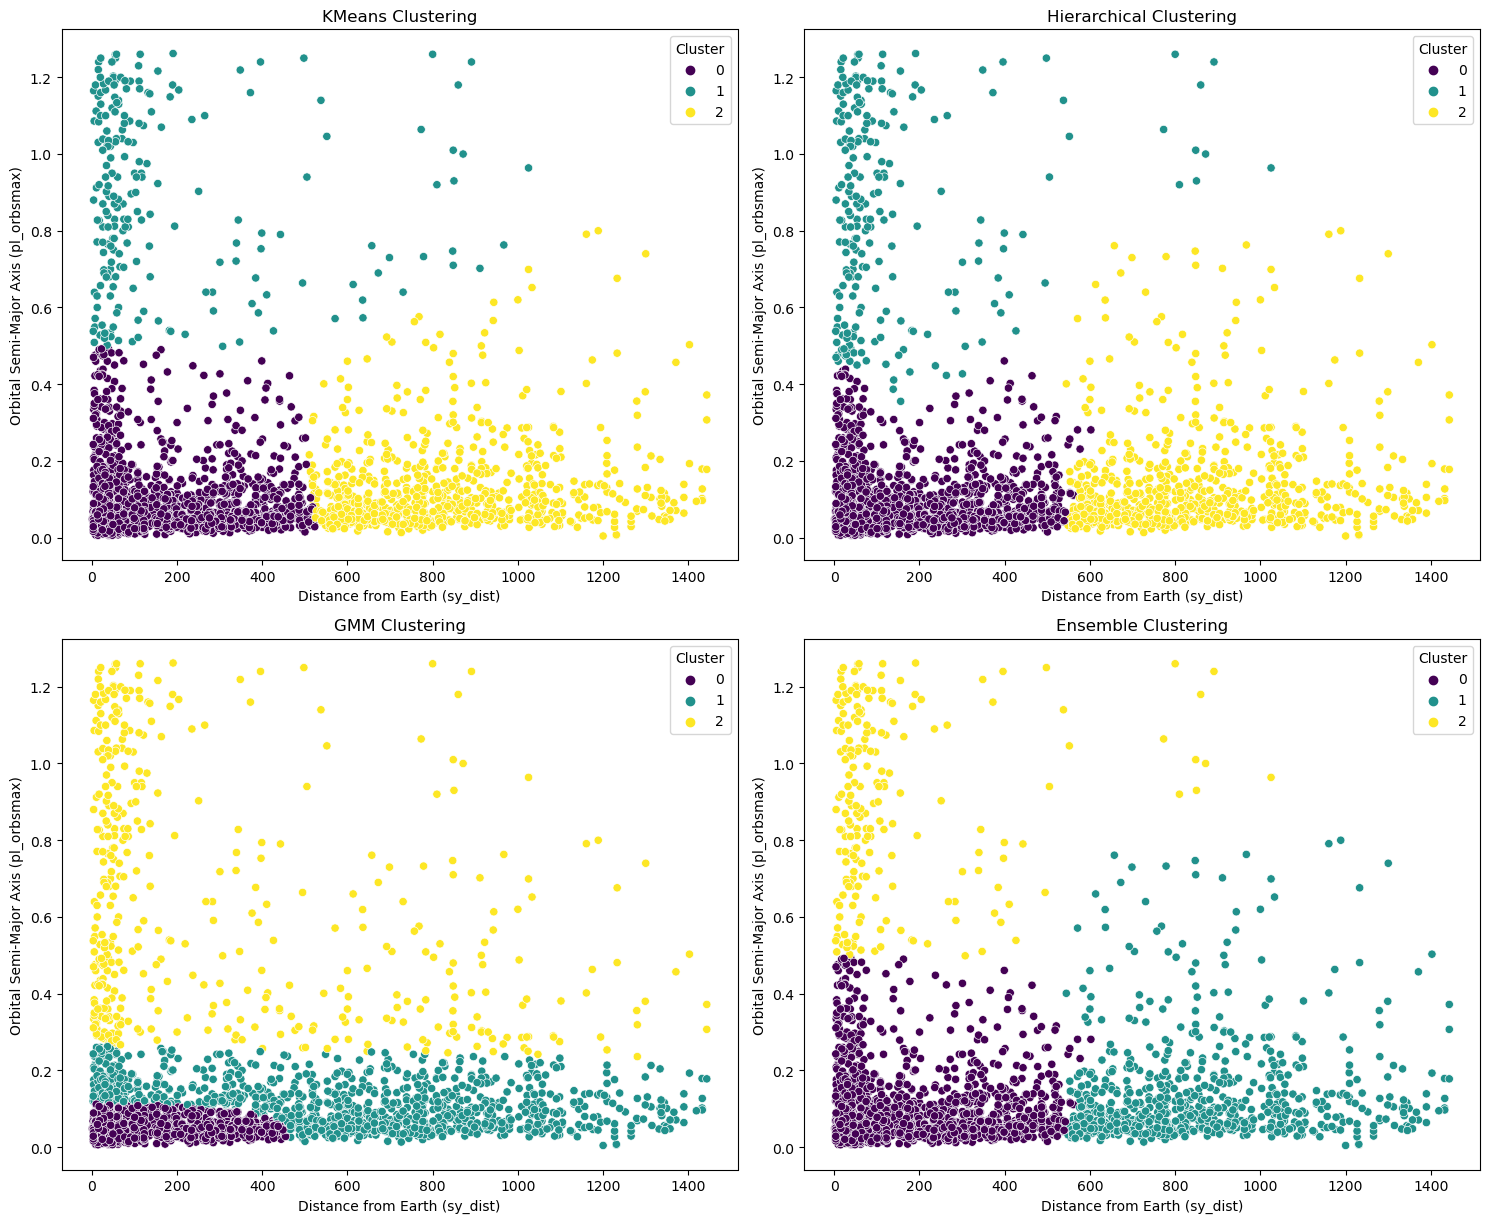

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

clustering_methods = [
    ('KMeans Clustering', kmeans_clusters),
    ('Hierarchical Clustering', hierarchical_clusters),
    #('DBSCAN Clustering', dbscan_clusters),
    ('GMM Clustering', gmm_clusters),
    ('Ensemble Clustering', ensemble_clusters),
]

plt.figure(figsize=(15, 18))

for idx, (title, clusters) in enumerate(clustering_methods, start=1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(x='sy_dist', y='pl_orbsmax', hue=clusters, data=data1_no_outliers, palette='viridis')
    plt.title(title)
    plt.xlabel('Distance from Earth (sy_dist)')
    plt.ylabel('Orbital Semi-Major Axis (pl_orbsmax)')
    plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

In [16]:
# Extracting the elements belonging to cluster 2 from the ensemble clustering
cluster_2_elements = clustered_data1[clustered_data1['Ensemble'] == 2]

# Getting the corresponding rows from the original data
data_phase1 = data.loc[cluster_2_elements.index]

In [17]:
data_phase1

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
19,30 Ari B b,30 Ari B,1,4,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,5.822,0.021,-0.021,6.96085,0.000512,-0.000512,2018-09-04,2017-03,2018-09-06
20,4 UMa b,4 UMa,1,1,1,Radial Velocity,2006,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,1.734,0.218,-0.218,4.23773,0.004729,-0.004729,2014-05-14,2007-09,2014-05-14
21,42 Dra b,42 Dra,1,2,1,Radial Velocity,2008,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,2.085,0.216,-0.216,4.43216,0.006238,-0.006238,2014-05-14,2009-06,2014-05-14
31,55 Cnc f,55 Cnc,1,2,5,Radial Velocity,2007,Multiple Observatories,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2018-10,2021-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,tau Cet e,tau Cet,1,1,4,Radial Velocity,2017,Multiple Observatories,Published Confirmed,0,...,-0.023,1.794,0.274,-0.274,3.24854,0.010399,-0.010399,2017-08-14,2017-10,2017-08-17
5477,tau Gem b,tau Gem,1,1,1,Radial Velocity,2013,Lick Observatory,Published Confirmed,0,...,-0.023,1.681,0.254,-0.254,4.03996,0.006709,-0.006709,2014-05-14,2013-07,2014-05-14
5479,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5481,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


In [18]:
data_phase1.to_csv('data_phase1.csv', index=False)